# Pima Indian Diabetes Prediction

In [1]:
#Importing basic packages
import pandas as pd
import numpy as np

#for EDA purposes
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport


#Importing the Dataset
dataset = pd.read_csv('diabetes.csv')


#EDA using Pandas Profiling
file = ProfileReport(dataset)
file.to_file(output_file='output.html')

Pandas profiling is an efficient way to get an overall as well as in-depth information about the dataset and the variables in it. However, caution must be exercised if the dataset is very large as Pandas Profiling is time-consuming. Since the dataset has only 768 observations and 9 columns, we use this function. The output gets saved as an HTML report in the working directory.

For the breakdown please see output.html. One can see the basic information about the dataset such as the size, missing values, etc. On the top right, we see 8 of numerical columns and 1 Boolean column (which is our dependent variable). In the lower panel, (%) of zeros are given in every column, which will be an useful information for us later. We do not have any categorical variable as an independent variable.


# Considering single Variables
1. Age. By having a quick look at the histogram on the top right, we can observe much of the characteristics. The variable does not follow a normal distribution as it is skewed to the right (or positively skewed). The average age is is 33 whereas the median age is 29. This further confirms our analysis (as in case of normal distribution, the mean should be approximately equal to the median). Most importantly, none of the values seem abnormal, that is, the minimum age of 21 and the maximum age of 81 are possible for the study. 

2. Blood Pressure. We can see that the variable can approximate to a normal distribution. However, we can not confirm that visually. We hence perform the Shapiro-Wilk test of normality. The null hypothesis (Ho) is that the data is normal.

In [2]:
from scipy.stats import shapiro
stat, p = shapiro(dataset['BloodPressure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.819, p=0.000


2. Continued. The p-value is less than 0.001, implying that at 5% Level of Significance (LOS) we reject our null hypothesis (Ho). Therefore, the variable does not follow a normal distribution. 
    
    Secondly, if we observe the minimum value for Blood Pressure, it is given as 0 (which is not possible). Therefore, there is incorrect information given. We have two choices now. One is to drop such observations (which results in 4.6% loss of data) or we can replace such values with median (imputing). I prefer imputing as we have a small dataset (768 observation only). Hence, every information is important. 
    
    We can simply replace the zero values by median or we can classify the variable based on outcome and then replace the two separately. The latter seems more efficient. We draw a violin graph to have a look at the behavior.

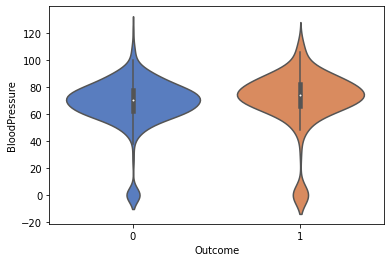

In [3]:
#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=dataset, palette='muted', split=True)

2. Continued. If we observe minutely, we can see that the box plot for 1 (Diabetic) inside the violin is a little more away from the horizontal axis than the box plot for 0 (Non Diabetic). It can be implied that diabetics seem to have a higher blood pressure than the non-diabetics. The bottom tail of the violins indicates the zero values we need to replace. We will replace the zeros for 1 with median of 1 and same for 0.

In [4]:
#Replacing the zero-values for Blood Pressure
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]

df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))

dataframe = [df1, df2]
dataset = pd.concat(dataframe)

3. BMI. The variable seems to be closely following the normal distribution as the mean and median are approximately equal. However, it faces the same problem as before, that is, the existence of zero-values. Let’s draw a violin plot for this variable.

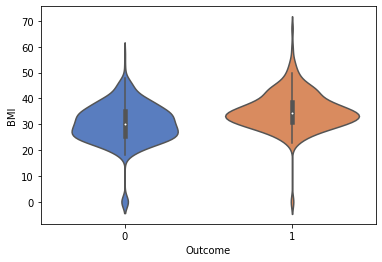

In [5]:
#Classifying the BMI based on class
ax = sns.violinplot(x='Outcome', y='BMI', data=dataset, palette='muted', split=True)

3. Continued. We can observe that the 1 follows normal distribution, while 0 doesn’t. Also, BMI for diabetics is more than BMI for non-diabetics (can be observed using box plot). We do the same treatment for zero-values in BMI that we followed for zero-values for Blood Pressure. In this case, we can also replace by mean, however, I will stick with median. We run the same code after changing the column name. Moving on to the next variable.

In [6]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]

df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))

dataframe = [df1, df2]
dataset = pd.concat(dataframe)

4. Diabetes Pedigree Function is a positively skewed variable with no zero values. We use the same violin plot to observe the characteristics.

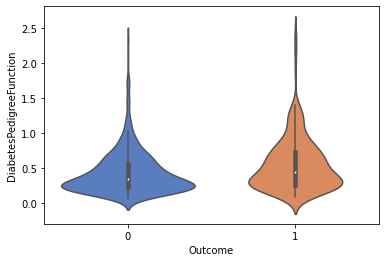

In [7]:
#Classifying the Diabeted Pedigree Function based on class
ax = sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=dataset, palette='muted', split=True)

4. Continued. Same hypothesis can be formed. Diabetics seem to have a higher pedigree function that the non-diabetics.
5. Glucose. We observe the variable not following the normal distribution. We encounter zero-values in this instance as well. There are 5 such values for which treatment is required. We perform the same treatment as before, replacing by median (class-wise).

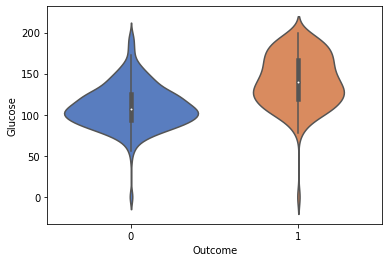

In [8]:
#Classifying the Glucose based on class
ax = sns.violinplot(x='Outcome', y='Glucose', data=dataset, palette='muted', split=True)

5. Continued. Observing the violin plot, we see a massive vertical distance between the box-plot for Diabetics and Non-Diabetics. This indicates that Glucose can be a very important variable in model-building.

In [9]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]

df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))

dataframe = [df1, df2]
dataset = pd.concat(dataframe)

6. Insulin. As mentioned in the data dictionary available with the dataset, Insulin is the 2-Hour serum insulin (mu U/ml). The variable is positively skewed. However, the occurrence of zero-values is high in this case, making up 48.7% of the data. This data has to be imputed. We first treat these.

In [10]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]

df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))

dataframe = [df1, df2]
dataset = pd.concat(dataframe)

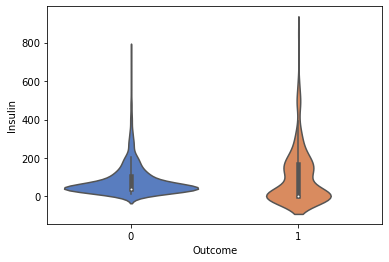

In [11]:
# vizualization
#Classifying the Insulin based on class
ax = sns.violinplot(x='Outcome', y='Insulin', data=dataset, palette='muted', split=True)

6. Continued. After treating the zero-values, we derive at this graph. We can still see 0 as the median for Insulin for Diabetics. However, for Non-Diabetics, Insulin is a little higher. It can be roughly hypothesized that Insulin for Diabetics is lower than Non-Diabetics.
7. Pregnancies. The variable is positively skewed with 14.5% zero values. We need not treat zero values as its not an abnormal occurrence. However, given the fact that 85.5% of the values is non-zero, we can infer that this study is done for females only. Looking at the behavior using violin plots we observe diabetic women had more pregnancies than non-diabetic.

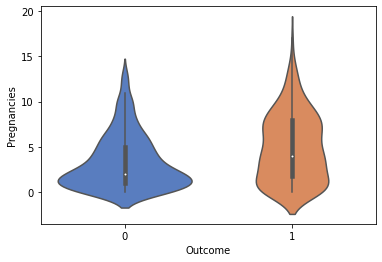

In [12]:
#Classifying the Pregnancies based on class
ax = sns.violinplot(x='Outcome', y='Pregnancies', data=dataset, palette='muted', split=True)

8. Skin Thickness. We observe the same patterns as most of the previous variable. The data is positively skewed with 29.6% of zero values. After treating, we use the violin plot to observe a crude relationship.

In [13]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]

df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))

dataframe = [df1, df2]
dataset = pd.concat(dataframe)

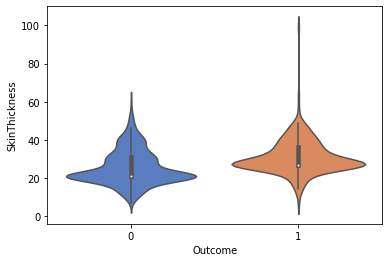

In [14]:
#Classifying the Skin Thickness based on class
ax = sns.violinplot(x='Outcome', y='SkinThickness', data=dataset, palette='muted', split=True)

8. Continued. Skin Thickness for Diabetics is more than that of Non-Diabetics.
9. Outcome. Our Dependent Variable ‘Outcome’ takes Boolean values 0 and 1. 0 indicates non-diabetic and 1 indicates diabetic. 
   
   The imbalance in the data can be clearly seen with 0 (Non-Diabetic) being the modal class. We will treat this imbalance later in the process.

# Checking for Multi collinearity
The correlation matrix below uses Pearson’s correlation coefficient to illustrate the relationship between variables. 

By a rule of thumb, in case of an r above 0.70, multi-collinearity is expected. Hence, no significant case of multi-collinearity is observed.

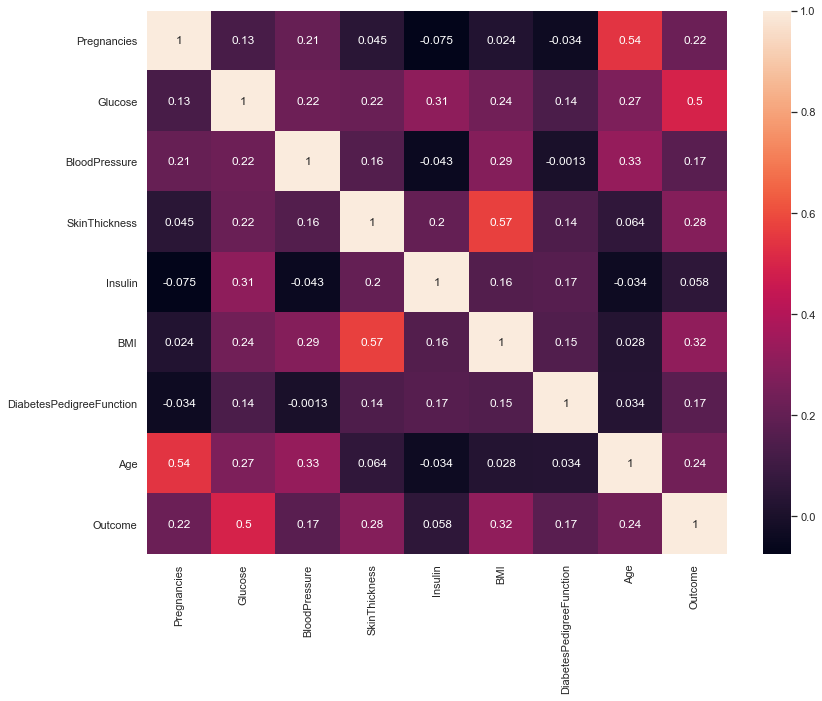

In [15]:
sns.set(rc={'figure.figsize':(13,10)})
corr  = dataset.corr()
sns.heatmap(corr, annot = True)
plt.show()

# Treating Outliers and Non-Normality
Outliers are extreme values existing in the dataset. It is necessary to treat outliers if a distance-based algorithm (logistic regression, SVM, etc) is applied on the dataset. Outliers do not affect a tree-based algorithm. Since we will use both distance and tree-based algorithms, we will scale our data to treat outliers. We use Standard Scaler for the process. Standard Scaler transforms the feature by subtracting the mean and dividing with the standard deviation. This way the feature also gets close to standard normal distribution with mean 0.

In [16]:
#Splitting the data into dependent and independent variables
Y = dataset.Outcome
x = dataset.drop('Outcome', axis = 1)
columns = x.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

We have scaled our X values.
# Splitting the dataset into Training and Test data
We now split our processed dataset into Training and Test data. The Test data size is take to be 15% of the entire data (which means 115 observations) and the model will be trained on 653 observations.

In [17]:
#Splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)

In [18]:
positive_y_train = y_train[y_train == 1]
negative_y_train = y_train[y_train == 0]

print(len(positive_y_train), len(negative_y_train))

222 430


A huge imbalance can be observed in the y_train values. To overcome this problem, we use the SMOTE technique.

Synthetic Minority Oversampling Technique (SMOTE) is used to remove the imbalance in the training data by creating samples using the current data. It does not create duplicates. Remember it is always done on the Training Date and not on the original data as the Test Data should only contain real-life values and not the synthetic sample.

In [19]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)
np.bincount(y_train)

array([430, 430], dtype=int64)

We now have a balanced Training data.

Our data is now prepared to fit a model
# Model Fitting: Logistic Regression
The first model we fit on the training data is the Logistic Regression.

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(f1_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

0.7349984770027413
0.7331730769230769
0.7409937888198758


We get a 74% accuracy score on the test data.

Our Precision for the model stands at 0.733. This indicates that 73% of the time our model classified the patients in a high risk category when they actually had a high risk of getting diabetes.

The Recall/Sensitivity is 0.740, implying of 74% of the time people having actually having high risk were classified correctly by our model.
# Model Fitting: Support Vector Machine (Kernel: rbf)
The first model we fit on the training data is the Support Vector Machine (SVM). SVM uses many kernels to classify the data. We use rbf/Gaussian kernel to fit the first model.

In [22]:
from sklearn.svm import SVC

classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(x_train, y_train)

y_pred = classifier_rbf.predict(x_test)

print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of SVC (RBF) classifier on test set: 0.78
0.7689950980392157
0.7666666666666666
0.7732919254658386


We have an improved accuracy using SVM with rbf kernel. The model accuracy comes to 76%, with improved Precision and Recall values compared to Logistic Regression.
# Model Fitting: Random Forest
We use Random Forest Classifier, with 300 trees (derived at after tuning the model) to fit a model on the data.

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.84
0.8352272727272727
0.8423423423423424
0.8304347826086957


We get the highest accuracy for Random Forest, with the score reaching 86%. This implies, our model predicted classified correctly 86% of the times.
The Precision score stood at 0.861, implying our model correctly classified observations with high risk in the high risk category 86.1% of the times. The Recall stood at 0.848.
We also have an F1 score of 0.853. The F1 score is the harmonic mean of precision and recall. It assigns equal weight to both the metrics. However, for our analysis it is relatively more important for the model to have low false negative cases (as it will be dangerous to classify high risk patients in low risk category). Therefore, we individually look at Precision and Recall.


In [24]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

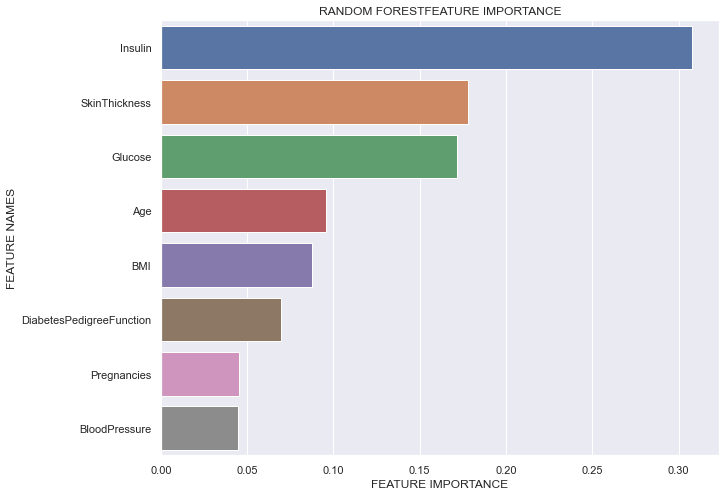

In [25]:
plot_feature_importance(model.feature_importances_, x_train.columns,'RANDOM FOREST')

The figure above shows the relative importance of features and their contribution to the model. Since it was a small dataset with less columns, I didn’t use Feature Selection technique such as PCA.
# Conclusion
We thus select the Random Forest Classifier as the right model due to high accuracy, precision and recall score. One reason why Random Forest Classifier showed an improved performance was because of the presence of outliers. As mentioned before, since Random Forest is not a a distance based algorithm, it is not much affected by outliers, whereas distance based algorithm such as Logistic Regression and Support Vector showed a lower performance.

Based on the feature importance:

1. Insulin is the most important factor in determining the onset of diabetes followed by Glucose and Skin Thickness.
2. Other factors such as Age, BMI, Diabetes Pedigree Function, Pregnancies and Blood Pressure also contributes to the prediction.

As we can see, the results derived from Feature Importance makes sense as one of the first things that actually is monitored in high-risk patients is the Insulin level. An increased Glucose might also indicate a risk of developing Type II Diabetes. Normally, especially in case of Type II Diabetes, there is a high risk of developing as the age of a person increases (given other factors).